In [123]:
from google.colab import drive;drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [125]:
df=pd.read_csv("/content/drive/My Drive/DataSet/winequality-red.csv",sep=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### Intuiton in X dimensions There's Split happen for predicting The Y Values ,Because this is Regression Problem thus every Datapoints on x dimensions will be splitted using information gain  & Entropy
## Link to Infromation Entropy -- > https://medium.com/coinmonks/what-is-entropy-and-why-information-gain-is-matter-4e85d46d2f01

### Click Link Below For Pict of Decision tress Intuiton

[How the X points Splitted](https://www.dropbox.com/s/ku663my9nlb5q04/Screenshot%20%28880%29.png?dl=0)

[How To Predict the Target](https://www.dropbox.com/s/0uyko4bo0nvpii8/Screenshot%20%28881%29.png?dl=0)

[The Tree](https://www.dropbox.com/s/9bv9fd1y41xp2hl/Screenshot%20%28882%29.png?dl=0)
 ## Credit To SuperdataScience  --> https://www.superdatascience.com/

#### Picture Below Might Help you Understand the concepts Better 


In [126]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

features=df.drop("quality",axis=1)
x_train,x_test,y_train,y_test = train_test_split(features,df["quality"],test_size=0.2)
df=pd.DataFrame(StandardScaler().fit_transform(df),columns=df.columns)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823


In [127]:
model=DecisionTreeRegressor(criterion="mse",random_state=42)
model.fit(x_train,y_train)
print(model.score(x_test,y_test))
print("Sadly Pretty Bad , lol ,but we here for intuiton right? We'll going to know how split affecting our result")
##Scaling does not affecting Decision tree models result

-0.24237121134134343
Sadly Pretty Bad , lol ,but we here for intuiton right? We'll going to know how split affecting our result


In [128]:
from sklearn.model_selection import KFold,GridSearchCV
hyperparams={"max_depth" : [None,1 , 2 , 3 , 4],
             "min_samples_split" : np.arange(1,20,1), ## Total Samples Required for each Split
             "min_samples_leaf": np.arange(1,5,1) }
ModelFinal=GridSearchCV(estimator=DecisionTreeRegressor(random_state=42),
                        param_grid=hyperparams,
                        cv=5,
                        verbose=True,
                        n_jobs=-1)
ModelFinal.fit(x_train,y_train)

Fitting 5 folds for each of 380 candidates, totalling 1900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 572 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 1900 out of 1900 | elapsed:    8.9s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=42, splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [None, 1, 2, 3, 4],
                         'min_samples_leaf': array([1, 2, 3, 4]),
                         'min_samples_split': array([ 1,  2,  3,  4,  5,  6,  7,

In [129]:
ModelResult=pd.DataFrame(ModelFinal.cv_results_)
print("Best Score  ",ModelFinal.best_score_)
print("Best Params ",ModelFinal.best_params_)
print("Score Testing " , ModelFinal.score(x_test,y_test))
print("Lol what an achievement , Let's Check What variables affected our results")

Best Score   0.28685102453895855
Best Params  {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 3}
Score Testing  0.1911697820517703
Lol what an achievement , Let's Check What variables affected our results


In [130]:
ModelResult.head()
ModelResult["param_max_depth"].replace({"None":0})

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
375    4.0
376    4.0
377    4.0
378    4.0
379    4.0
Name: param_max_depth, Length: 380, dtype: float64

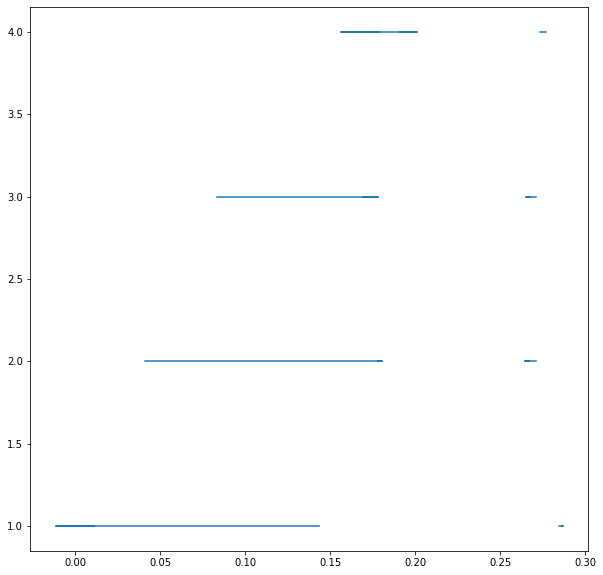

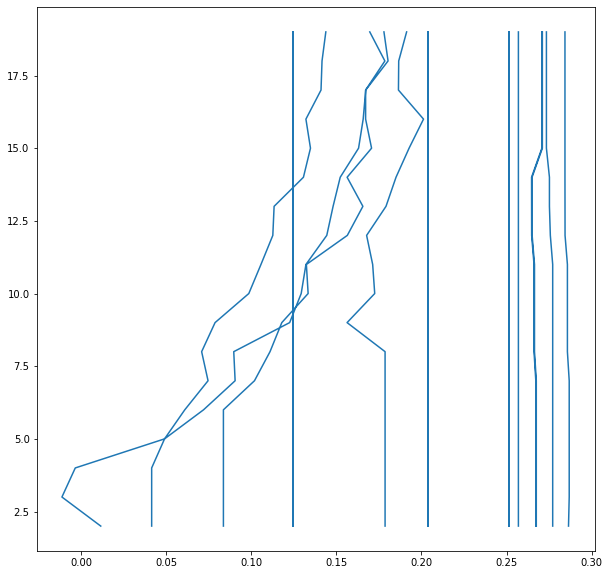

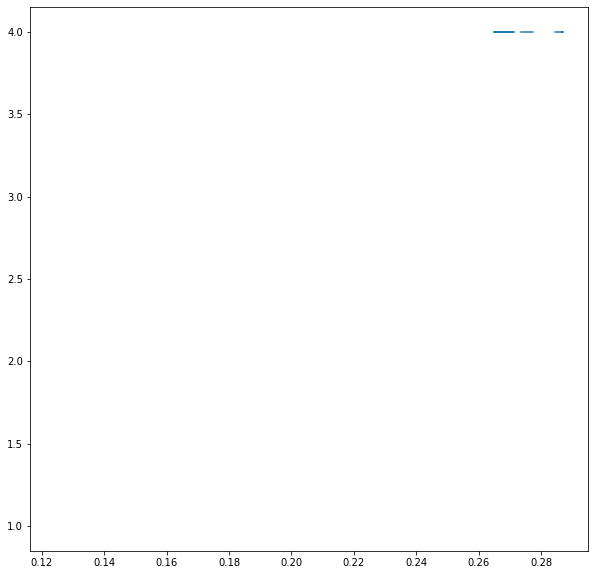

In [131]:
plt.figure(figsize=(10,10))
plt.plot(ModelResult["mean_test_score"],ModelResult["param_min_samples_leaf"])

plt.show()
plt.figure(figsize=(10,10))
plt.plot(ModelResult["mean_test_score"],ModelResult["param_min_samples_split"])
plt.show()

plt.figure(figsize=(10,10))
plt.plot(ModelResult["mean_test_score"],ModelResult["param_max_depth"])
plt.show()

In [132]:
ModelResult["param_max_depth"].unique() 
print("Based on plot above and my testing these Parameters Give hihgly pressure lol \
'min_samples_leaf': 'min_samples_split'}")

Based on plot above and my testing these Parameters Give hihgly pressure lol 'min_samples_leaf': 'min_samples_split'}


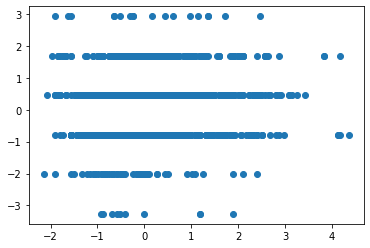

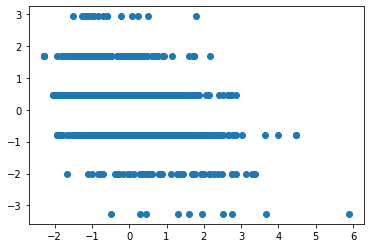

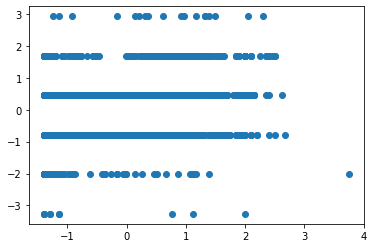

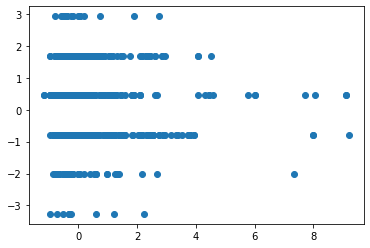

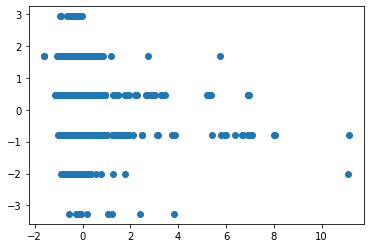

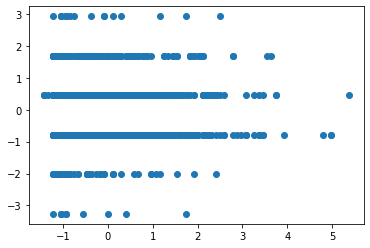

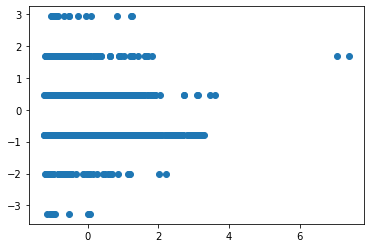

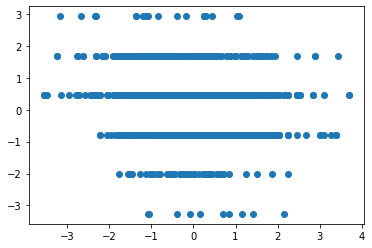

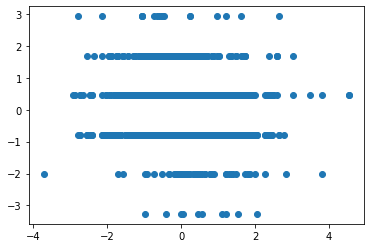

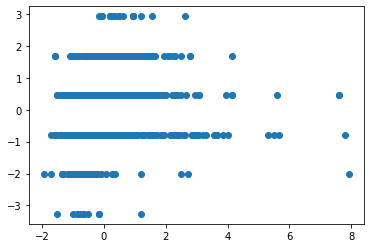

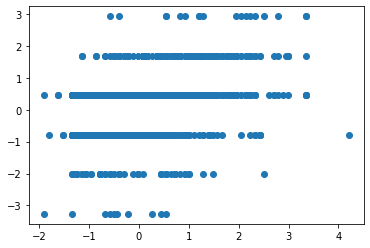

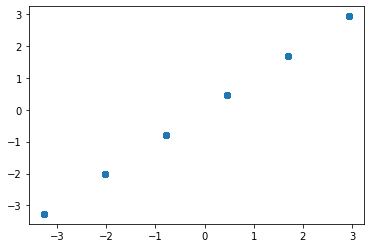

In [133]:
for i in df.columns: 
  plt.scatter(df[i],df["quality"])
  plt.show()

Lol all of those are categories var? LOL

In [0]:
## And You Now, Know The intuiton ,Thanks